In [1]:
import torchvision.models.segmentation as segmentation
from PIL import Image
from torchvision import transforms
import cv2
import numpy as np
import torch
import os
%matplotlib inline

classes = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
           'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
           'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

resnet = segmentation.fcn_resnet101(pretrained=True)

In [2]:
def classify(img):
    width = 520
    original_shape = img.shape
    img = cv2.resize(img, (width, width))

    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    output = resnet(input_batch)['out'][0]
    pixelwise_output_predictions = output.argmax(0)    
    
    return pixelwise_output_predictions

def plot_prediction(pixelwise_output_predictions, original_shape=(200,200)):
    # create a color pallette, selecting a color for each class
    palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
    colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
    colors = (colors % 255).numpy().astype("uint8")

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(pixelwise_output_predictions.byte().cpu().numpy()).resize((original_shape[1], original_shape[0]))
    r.putpalette(colors)

    import matplotlib.pyplot as plt
    plt.imshow(r)
    plt.show()

classify(cv2.imread('image/clint.jpg', cv2.IMREAD_COLOR)[:,:,::-1])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [3]:
from paint import *

img_dir = 'VOC2012/JPEGImages/'

actor_fns = ['pretrained_models/gan/actor.pkl', 
             'pretrained_models/cml1/actor.pkl']
renderer_fn = 'renderer_constrained.pkl'

info_dict = {}

for img_fn in os.listdir(img_dir):
    img_results = {}
    for actor_fn in actor_fns:
        #print(img_fn)
        
        img_results[actor_fn] = []
        
        true_pred = classify(cv2.imread(img_dir + img_fn, cv2.IMREAD_COLOR)[:,:,::-1])
        actions_whole, actions_divided, all_canvases, final_result \
                = paint(actor_fn, renderer_fn, max_step=150, div=1, discrete_colors=False, img=img_dir + img_fn)
        #print('true')
        #plot_prediction(true_pred)
        #for canvas in all_canvases:
        for i in range(0, len(all_canvases), 10):
            canvas = all_canvases[i]
            pred = classify(canvas)
            #print('pred')
            #plot_prediction(pred)
            match = torch.eq(pred, true_pred)
            #plt.matshow(match)
            #plt.show()
            prop_correct = 1.0 * torch.sum(match) / (match.flatten().shape[0])
            
            img_results[actor_fn].append(prop_correct)
            
            print(prop_correct)
    info_dict[img_fn] = img_results

tensor(0.8257)
tensor(0.8914)
tensor(0.8946)
tensor(0.8693)
tensor(0.8681)
tensor(0.8739)
tensor(0.8922)
tensor(0.8977)
tensor(0.8855)
tensor(0.8807)
tensor(0.8769)
tensor(0.9026)
tensor(0.8971)
tensor(0.8943)
tensor(0.8770)
tensor(0.8937)
tensor(0.8838)
tensor(0.9112)
tensor(0.9001)
tensor(0.8758)
tensor(0.8874)
tensor(0.9009)
tensor(0.9020)
tensor(0.9048)
tensor(0.8836)
tensor(0.8454)
tensor(0.8639)
tensor(0.8843)
tensor(0.8560)
tensor(0.8558)
tensor(0.8518)
tensor(0.8750)
tensor(0.8643)
tensor(0.8648)
tensor(0.8485)
tensor(0.8684)
tensor(0.8645)
tensor(0.8841)
tensor(0.8777)
tensor(0.8665)
tensor(0.8732)
tensor(0.8655)
tensor(0.8655)
tensor(0.8628)
tensor(0.8498)
tensor(0.8684)
tensor(0.8750)
tensor(0.8849)
tensor(0.8939)
tensor(0.8960)
tensor(0.8645)
tensor(0.9189)
tensor(0.9010)
tensor(0.9128)
tensor(0.9091)
tensor(0.8969)
tensor(0.9063)
tensor(0.8939)
tensor(0.8822)
tensor(0.8724)
tensor(0.9116)
tensor(0.8965)
tensor(0.8986)
tensor(0.9046)
tensor(0.9248)
tensor(0.9349)
tensor(0.9

tensor(0.8111)
tensor(0.8161)
tensor(0.8035)
tensor(0.8280)
tensor(0.8333)
tensor(0.8064)
tensor(0.8333)
tensor(0.8062)
tensor(0.8239)
tensor(0.8237)
tensor(0.8180)
tensor(0.7946)
tensor(0.8088)
tensor(0.7856)
tensor(0.7990)
tensor(0.8272)
tensor(0.8265)
tensor(0.8128)
tensor(0.8186)
tensor(0.8204)
tensor(0.8265)
tensor(0.8264)
tensor(0.8261)
tensor(0.8167)
tensor(0.8123)
tensor(0.8243)
tensor(0.8156)
tensor(0.8011)
tensor(0.8122)
tensor(0.8160)
tensor(0.8095)
tensor(0.8093)
tensor(0.8242)
tensor(0.8212)
tensor(0.8214)
tensor(0.8174)
tensor(0.8173)
tensor(0.8211)
tensor(0.8216)
tensor(0.8147)
tensor(0.8171)
tensor(0.8205)
tensor(0.7982)
tensor(0.8092)
tensor(0.8099)
tensor(0.7910)
tensor(0.7958)
tensor(0.7990)
tensor(0.7803)
tensor(0.7459)
tensor(0.7702)
tensor(0.7627)
tensor(0.7691)
tensor(0.7703)
tensor(0.8697)
tensor(0.8777)
tensor(0.8754)
tensor(0.9169)
tensor(0.9225)
tensor(0.8855)
tensor(0.9244)
tensor(0.9386)
tensor(0.9312)
tensor(0.9292)
tensor(0.9211)
tensor(0.9201)
tensor(0.9

tensor(0.8709)
tensor(0.8491)
tensor(0.8618)
tensor(0.8609)
tensor(0.8462)
tensor(0.8461)
tensor(0.8467)
tensor(0.8422)
tensor(0.8535)
tensor(0.8498)
tensor(0.8498)
tensor(0.8538)
tensor(0.8506)
tensor(0.8508)
tensor(0.8439)
tensor(0.8311)
tensor(0.8130)
tensor(0.8203)
tensor(0.8221)
tensor(0.8261)
tensor(0.8185)
tensor(0.8205)
tensor(0.8167)
tensor(0.8114)
tensor(0.8136)
tensor(0.8195)
tensor(0.8139)
tensor(0.8134)
tensor(0.8285)
tensor(0.8246)
tensor(0.8351)
tensor(0.8335)
tensor(0.8232)
tensor(0.7980)
tensor(0.8790)
tensor(0.8613)
tensor(0.8662)
tensor(0.8927)
tensor(0.8735)
tensor(0.8844)
tensor(0.8910)
tensor(0.8893)
tensor(0.8636)
tensor(0.8759)
tensor(0.8704)
tensor(0.8690)
tensor(0.8847)
tensor(0.8707)
tensor(0.8621)
tensor(0.8588)
tensor(0.8461)
tensor(0.8605)
tensor(0.8773)
tensor(0.8720)
tensor(0.8499)
tensor(0.8659)
tensor(0.8589)
tensor(0.8437)
tensor(0.8533)
tensor(0.8500)
tensor(0.8781)
tensor(0.8805)
tensor(0.8835)
tensor(0.8814)
tensor(0.8792)
tensor(0.8570)
tensor(0.8

KeyboardInterrupt: 

torch.Size([75])
torch.Size([75])


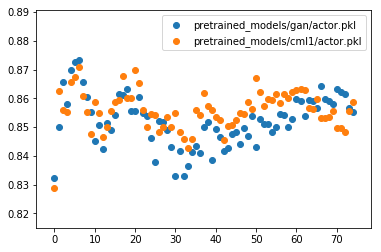

In [18]:
total_results = [None,]*len(actor_fns)
#print(total_results)
for img_fn in info_dict.keys():
    #print(img_fn)
    for actor_fn in info_dict[img_fn].keys():
        #print(actor_fn)
        if total_results[actor_fns.index(actor_fn)] is None:
            print(torch.Tensor(info_dict[img_fn][actor_fn]).shape)
            total_results[actor_fns.index(actor_fn)] = torch.Tensor(info_dict[img_fn][actor_fn])
        else:
            total_results[actor_fns.index(actor_fn)] += torch.Tensor(info_dict[img_fn][actor_fn])
        
#total_results / len(info_dict.keys())
for actor_fn in actor_fns:
    plt.scatter(x=np.arange(75), y=total_results[actor_fns.index(actor_fn)] / len(info_dict.keys()), label=actor_fn)
plt.legend()
plt.show()

In [96]:
import xml.etree.ElementTree as ET
import os

annot_dir = 'VOC2012/Annotations/'

annotations = {}

for filename in os.listdir(annot_dir):
    tree = ET.parse(annot_dir + filename)
    root = tree.getroot()
    name = filename.replace('.xml','')
    #print(name)
    objects_ar = []
    for obj in root.findall('object'):
        obj_dict = {}
        for obj_name in obj.findall('name'):
            #print(obj_name.text, classes.index(obj_name.text))
            obj_dict['name'] = obj_name.text
            obj_dict['ind'] = classes.index(obj_name.text)
        for size in obj.findall('size'):
            for width in bndbox.findall('width'):
                obj_dict['original_width'] = int(width)
            for height in bndbox.findall('height'):
                obj_dict['original_height'] = int(height)
        for bndbox in obj.findall('bndbox'):
            for bnd in bndbox.findall('xmin'):
                obj_dict['xmin'] = int(bnd.text)
            for bnd in bndbox.findall('xmax'):
                obj_dict['xmax'] = int(bnd.text)
            for bnd in bndbox.findall('ymin'):
                obj_dict['ymin'] = int(bnd.text)
            for bnd in bndbox.findall('ymax'):
                obj_dict['ymax'] = int(bnd.text)
        objects_ar.append(obj_dict)
    annotations[name] = {}
    annotations[name]['objects'] = objects_ar
#annotations

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

img_dir = 'VOC2012/JPEGImages/'
for img_name in annotations.keys():
    img_fn = img_dir + img_name + '.jpg'
    full_img = cv2.imread(img_fn, cv2.IMREAD_COLOR)[:,:,::-1]
    annotation = annotations[img_name]
    #print(img_fn)
    #plt.imshow(full_img)
    #plt.show()
    for obj in annotation['objects']:
        print(obj)
        img_just_obj = full_img[obj['ymin']:obj['ymax'], obj['xmin']:obj['xmax'], :]
        #plt.imshow(img_just_obj)
        #plt.show()
        predictions = classify(img_just_obj)
        print(predictions)
        print('true ', obj['ind'], 'pred ', torch.argmax(predictions[1:]) + 1)


{'name': 'person', 'ind': 15, 'xmin': 174, 'xmax': 349, 'ymin': 101, 'ymax': 351}
tensor([ 8.8358, -1.1193, -1.1473, -1.0111, -0.2464, -0.9082, -0.8387,  0.2525,
        -0.9701,  0.5917, -1.4688,  0.9092, -0.7508, -1.1490, -1.1254,  2.9162,
        -0.4624, -1.4968, -0.1229, -0.2435, -0.3459], grad_fn=<MeanBackward1>)
true  15 pred  tensor(15)
{'name': 'aeroplane', 'ind': 1, 'xmin': 104, 'xmax': 375, 'ymin': 78, 'ymax': 183}
tensor([ 8.7491, -1.1205, -1.1376, -1.0121, -0.2541, -0.9077, -0.8070,  0.2840,
        -0.9535,  0.5712, -1.4323,  0.9153, -0.7517, -1.1376, -1.1121,  2.8018,
        -0.4392, -1.4708, -0.1195, -0.2411, -0.3279], grad_fn=<MeanBackward1>)
true  1 pred  tensor(15)
{'name': 'aeroplane', 'ind': 1, 'xmin': 133, 'xmax': 197, 'ymin': 88, 'ymax': 123}
tensor([ 8.6407, -1.1382, -1.1511, -0.9850, -0.2681, -0.8906, -0.8075,  0.2268,
        -0.9341,  0.5850, -1.4160,  0.9107, -0.7079, -1.1149, -1.1362,  2.8579,
        -0.4387, -1.4733, -0.1194, -0.2243, -0.3136], grad_fn=<

KeyboardInterrupt: 

In [4]:
import torchvision.models.segmentation as segmentation

resnet = segmentation.fcn_resnet101(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\Peter/.cache\torch\checkpoints\resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\Peter/.cache\torch\checkpoints\fcn_resnet101_coco-7ecb50ca.pth


In [8]:
# help(resnet)
help(resnet)


Help on FCN in module torchvision.models.segmentation.fcn object:

class FCN(torchvision.models.segmentation._utils._SimpleSegmentationModel)
 |  Implements a Fully-Convolutional Network for semantic segmentation.
 |  
 |  Arguments:
 |      backbone (nn.Module): the network used to compute the features for the model.
 |          The backbone should return an OrderedDict[Tensor], with the key being
 |          "out" for the last feature map used, and "aux" if an auxiliary classifier
 |          is used.
 |      classifier (nn.Module): module that takes the "out" element returned from
 |          the backbone and returns a dense prediction.
 |      aux_classifier (nn.Module, optional): auxiliary classifier used during training
 |  
 |  Method resolution order:
 |      FCN
 |      torchvision.models.segmentation._utils._SimpleSegmentationModel
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods inherited from torchvision.models.segmentation._utils._SimpleSegme

In [39]:
from PIL import Image
from torchvision import transforms
input_image = Image.open('image/clint.jpg')
input_image = cv2.imread('image/clint.jpg', cv2.IMREAD_COLOR)
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

output = resnet(input_batch)['out'][0]
output_predictions = output.argmax(0)
output_predictions.shape

torch.Size([440, 440])

In [37]:
import cv2
import numpy as np
import torch
device = 'cpu'
# width = 520
# img = cv2.imread('image/clint.jpg', cv2.IMREAD_COLOR)
# img = cv2.resize(img, (width, width))
# img = img.reshape(1, width, width, 3)
# img = np.transpose(img, (0, 3, 1, 2))
# img = torch.tensor(img).to(device).float() / 255.
img = input_batch
print(img.shape)
# print(resnet(img)['aux'].shape)
# pix_pred = resnet(img)['out']
print(resnet.classifier)
# help(resnet.classifier)
# print(resnet.backbone(img)['out'].shape)
pred = resnet.classifier(resnet.backbone(img)['out'])
print(pred.shape)
for i in range(21):
    print(pred[0,i,:,:])

torch.Size([1, 3, 440, 440])
FCNHead(
  (0): Conv2d(2048, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.1, inplace=False)
  (4): Conv2d(512, 21, kernel_size=(1, 1), stride=(1, 1))
)
torch.Size([1, 21, 55, 55])
tensor([[13.3556, 14.3556, 12.1097,  ..., 13.0071, 15.1190, 12.7221],
        [13.1595, 15.0648, 12.5816,  ..., 16.7486, 16.2568, 14.2603],
        [12.5285, 13.7900, 12.7179,  ..., 15.3280, 16.6753, 13.6351],
        ...,
        [12.3391, 13.1705, 11.2667,  ..., 10.6370,  9.3852,  7.3976],
        [11.9025, 12.0127, 10.0946,  ..., 10.3399,  8.7669,  7.2733],
        [11.8392, 10.0809,  9.8875,  ...,  9.1893,  8.2898,  7.2679]],
       grad_fn=<SliceBackward>)
tensor([[ 1.7355e-01, -1.3869e-03, -8.1726e-01,  ...,  9.6078e-01,
          1.9075e+00,  2.7704e+00],
        [ 4.7776e-01,  8.8657e-02, -9.1564e-01,  ...,  7.3847e-01,
          2

       grad_fn=<SliceBackward>)
tensor([[-1.1650, -0.7497, -0.7875,  ..., -1.7071, -2.0555, -0.9653],
        [-0.0442, -0.4542, -0.7800,  ..., -1.8173, -2.2500, -1.4461],
        [ 0.2658,  0.2868, -0.0535,  ..., -1.2255, -1.3220, -0.3388],
        ...,
        [ 0.9858,  1.6994,  0.8390,  ..., -1.2548, -0.7171,  0.3975],
        [ 1.1373,  1.1000,  1.0136,  ..., -1.5451, -1.5509, -0.5188],
        [-0.1510,  0.5076,  0.2383,  ..., -1.7818, -2.0851, -1.8516]],
       grad_fn=<SliceBackward>)
tensor([[-2.0300, -1.9647, -0.9606,  ..., -1.2760, -1.9827, -2.3401],
        [-1.6970, -1.7434, -0.6301,  ..., -0.3247, -2.1726, -1.8497],
        [-1.7047, -1.8516, -0.5383,  ..., -0.3992, -1.9026, -1.8058],
        ...,
        [-0.7058, -0.9869, -0.9424,  ..., -0.6067, -0.7103, -0.7466],
        [-0.3507, -0.2732, -0.4103,  ..., -1.4146, -1.5187, -1.1322],
        [ 0.4360,  0.4869,  0.3730,  ..., -1.0305, -0.9889, -0.4635]],
       grad_fn=<SliceBackward>)
tensor([[ 1.8554,  1.9935,  0.5628, 